<a href="https://colab.research.google.com/github/amazuzu/hackaton_2021/blob/master/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras and Deep Learning

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)


In [ ]:
import pandas as pd

X_train = pd.DataFrame(data=twenty_train.data)
print(X_train.iloc[0])
print(X_train.dtypes)
print(X_train.shape)


0    From: lerxst@wam.umd.edu (where's my thing)\nS...
Name: 0, dtype: object
0    object
dtype: object
(11314, 1)


In [ ]:
from sklearn.model_selection import train_test_split



sentences_train, sentences_test, y_train, y_test = train_test_split(twenty_train.data, twenty_train.target, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
#-------------------------
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
print(dummy_y.shape)
print(dummy_y_test.shape)
print(dummy_y)

(8485, 20)
(2829, 20)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf

input_dim = X_train.shape[1]  # Number of features
print(f'input_dim={input_dim}')

# create model
model = Sequential(name='xnet')
model.add(layers.Dense(5, input_shape=(input_dim,), activation='relu',name='alpha'))
model.add(layers.Dense(20, activation='softmax', name='beta'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )
model.summary()

input_dim=113477
Model: "xnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
alpha (Dense)                (None, 5)                 567390    
_________________________________________________________________
beta (Dense)                 (None, 20)                120       
Total params: 567,510
Trainable params: 567,510
Non-trainable params: 0
_________________________________________________________________


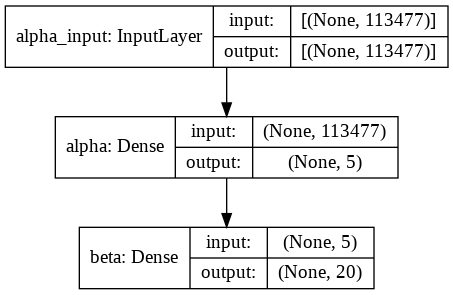

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# X_train2 = X_train.reshape(-1, 113477)
# X_train2 = tf.expand_dims(X_train, axis=-1)
print(X_train.shape)
print(X_test.shape)
print(dummy_y.shape)
print(dummy_y_test.shape)
#print(X_train[0])
# print(X_train2.shape)
# validation_data=(X_test, dummy_y_test),
history = model.fit(X_train, dummy_y,  epochs=100, verbose=False, batch_size=10,  validation_data=(X_test, dummy_y_test))

(8485, 113477)
(2829, 113477)
(8485, 20)
(2829, 20)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/xnet/alpha/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/xnet/alpha/embedding_lookup_sparse/Reshape:0", shape=(None, 5), dtype=float32), dense_shape=Tensor("gradient_tape/xnet/alpha/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [ ]:
loss, accuracy = model.evaluate(X_train, dummy_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print(history.history.keys())

Training Accuracy: 0.9998
Testing Accuracy:  0.7946
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

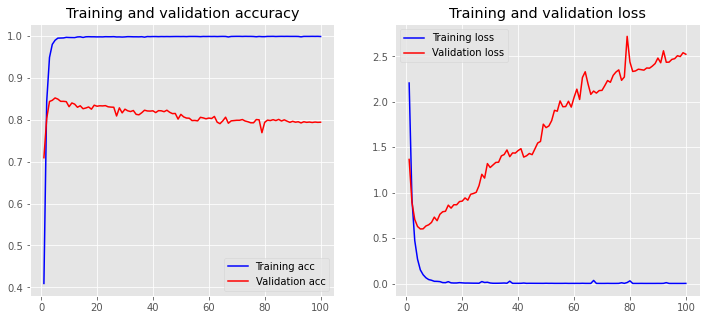

In [ ]:
plot_history(history)

In [ ]:
score = model.evaluate(X_test, dummy_y_test, verbose=0) 

In [ ]:
print(score)

[2.523381471633911, 0.7946270704269409]
